#### EDA Project number 01

In [15]:
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Titanic-Dataset.csv')

In [17]:
df.shape

(891, 12)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df['child'] = df['SibSp'] + df['Parch']

In [23]:
df.drop(['Name' , 'SibSp' , 'Parch'] , axis=1 , inplace=True)

In [24]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,male,22.0,A/5 21171,7.25,NaN,S,1


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,child
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


##### Handling the missing vales!

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
child            0
dtype: int64

In [31]:
# age ----- numerica columns 
# Cabin ---- categorical columns 
# embarked - categorical columns
df['Age'].fillna(df['Age'].mean() , inplace=True) 
df['Cabin'].fillna(df['Cabin'].mode()[0] , inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True)

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
child          0
dtype: int64

### EDA 

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'child'],
      dtype='object')

##### Gender

In [34]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt

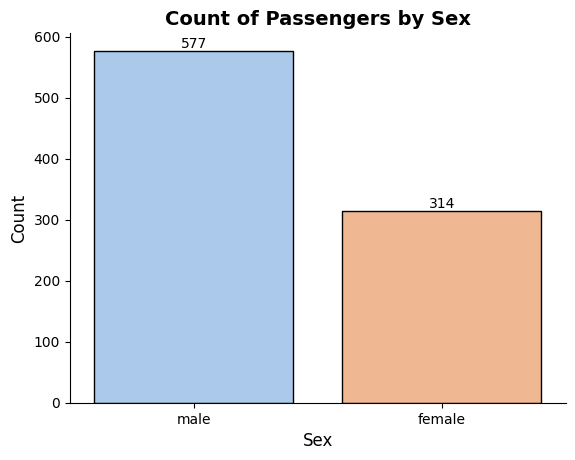

In [40]:
ax = sns.countplot(x='Sex', data=df, palette='pastel', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

ax.set_title('Count of Passengers by Sex', fontsize=14, fontweight='bold')
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
sns.despine()
plt.show()


Text(0, 0.5, 'Survived')

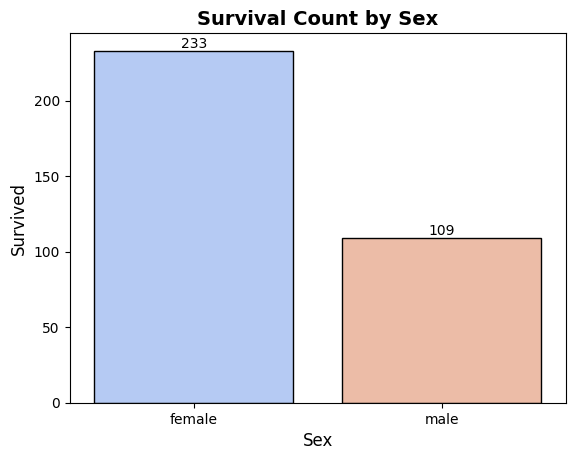

In [42]:
# bar chat for sex vs servived 
death_rate = df.groupby(['Sex'] , as_index=False)['Survived'].sum().sort_values(by='Survived' , ascending=False)

ax = sns.barplot(x = 'Sex' , y = 'Survived' , data=death_rate , palette='coolwarm', edgecolor='black')
for container in ax.containers:  
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
ax.set_title('Survival Count by Sex', fontsize=14, fontweight='bold')  
ax.set_xlabel('Sex', fontsize=12)  
ax.set_ylabel('Survived', fontsize=12)

###### from the above graph we can see that most of the Male where in the ship but the death rate of Male is also highter than the Female

#### Age

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'child'],
      dtype='object')

In [48]:
## making the age group column from the age column 
def create_age_groups(df, age_column='Age'):
    bins = range(0, 101, 10)  
    labels = [f'{i}-{i+10}' for i in bins[:-1]]  
    df['Age_Group'] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df


In [50]:
df = create_age_groups(df , age_column='Age')

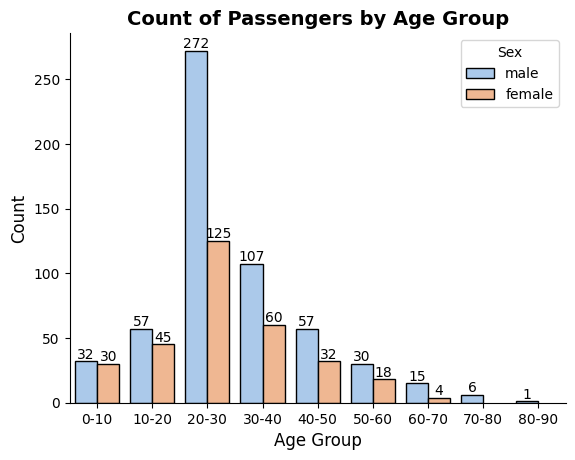

In [59]:
ax1 = sns.countplot(x='Age_Group', data=df, palette='pastel', edgecolor='black', hue="Sex", order=sorted(df['Age_Group'].unique()))
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

ax1.set_title('Count of Passengers by Age Group', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
sns.despine()
plt.show()


Text(0, 0.5, 'Survived')

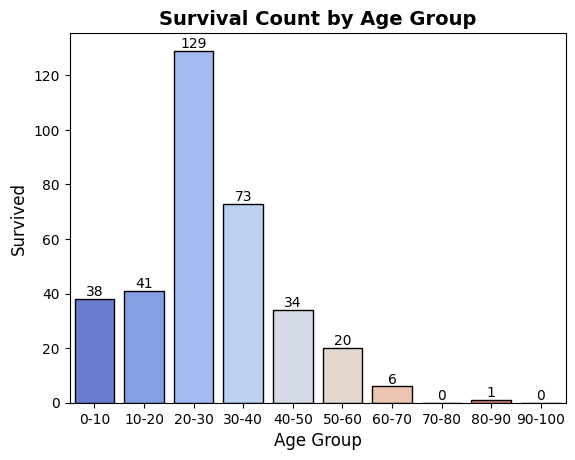

In [60]:
### servived vs aggroup
death_rate_age = df.groupby(['Age_Group'] , as_index=False)['Survived'].sum().sort_values(by='Survived' , ascending=False)

ax = sns.barplot(x = 'Age_Group' , y = 'Survived' , data=death_rate_age , palette='coolwarm', edgecolor='black')
for container in ax.containers:  
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
    
ax.set_title('Survival Count by Age Group', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=12)  
ax.set_ylabel('Survived', fontsize=12)

###### from the above graph we see that mostly passenger where between 20-30 , and mostly they where Alived

#### Pclass

In [62]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

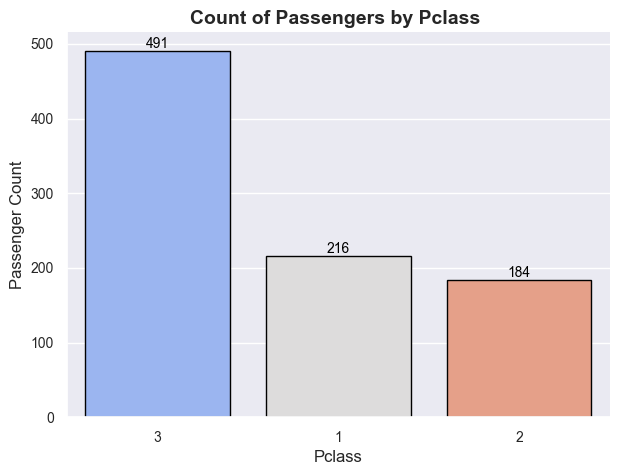

In [83]:
ax3 = sns.countplot(x='Pclass', data=df, palette='coolwarm', edgecolor='black', order=df['Pclass'].value_counts().index)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

ax3.set_title('Count of Passengers by Pclass ', fontsize=14, fontweight='bold')
ax3.set_xlabel('Pclass', fontsize=12)
ax3.set_ylabel('Passenger Count', fontsize=12)
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Text(0, 0.5, 'Survived')

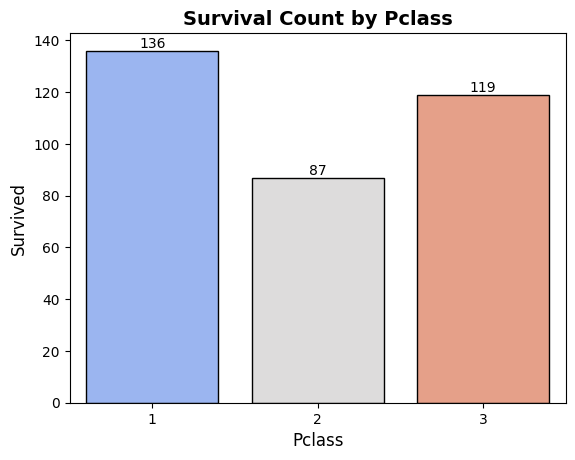

In [66]:
pclass_alived = df.groupby(['Pclass'] , as_index=False)['Survived'].sum().sort_values(by='Survived' , ascending=False)

ax = sns.barplot(x = 'Pclass' , y = 'Survived' , data=pclass_alived , palette='coolwarm', edgecolor='black')
for container in ax.containers:  
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
    
ax.set_title('Survival Count by Pclass', fontsize=14, fontweight='bold')
ax.set_xlabel('Pclass', fontsize=12)  
ax.set_ylabel('Survived', fontsize=12)

#### Embarked

In [77]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

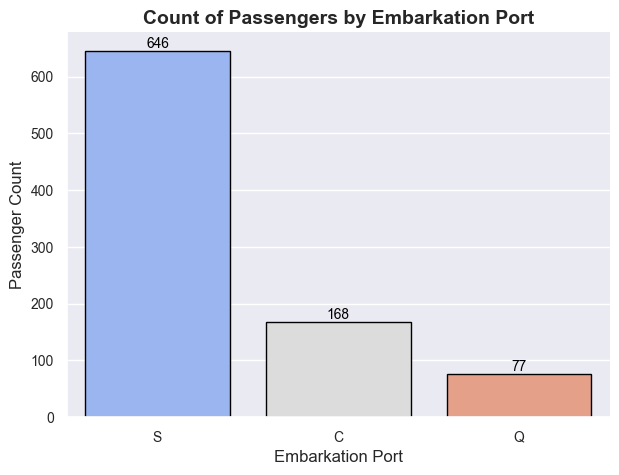

In [80]:
ax3 = sns.countplot(x='Embarked', data=df, palette='coolwarm', edgecolor='black', order=df['Embarked'].value_counts().index)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

ax3.set_title('Count of Passengers by Embarkation Port', fontsize=14, fontweight='bold')
ax3.set_xlabel('Embarkation Port', fontsize=12)
ax3.set_ylabel('Passenger Count', fontsize=12)
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Text(0, 0.5, 'Survived')

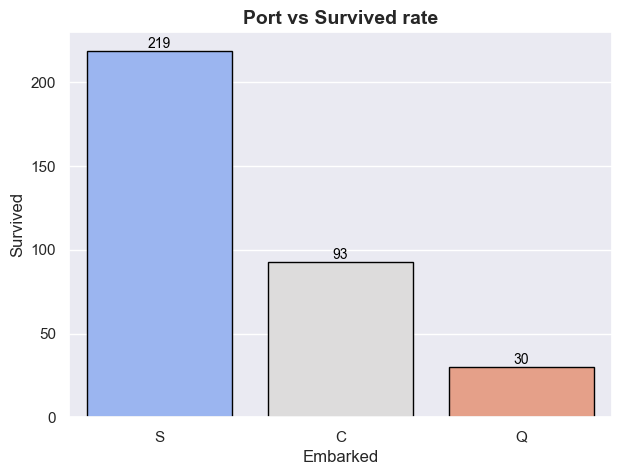

In [81]:
sea_port = df.groupby(['Embarked'] , as_index=False)['Survived'].sum().sort_values(by='Survived' , ascending=False)

ax = sns.barplot(x = 'Embarked' , y = 'Survived' , data=sea_port , palette='coolwarm', edgecolor='black')
for container in ax.containers:  
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
    
ax.set_title('Port vs Survived rate', fontsize=14, fontweight='bold')
ax.set_xlabel('Embarked', fontsize=12)  
ax.set_ylabel('Survived', fontsize=12)

#### Final Conclusion

#### Most passengers were male.
The death rate of women was higher than that of men. <br>
Most passengers were between the ages of 20-30. <br>
Most younger passengers arrived between the ages of 20-30. <br>
Most passengers were from class 3, but the survival rate was higher for passengers in class 1. <br>
Most passengers boarded from (S), and they had a higher chance of survival.